In [2]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [3]:
from keras.datasets import imdb #리뷰 데이터
(X_data, y_data),(tt_x, tt_y)=imdb.load_data(num_words = 500)
#가장 많이 등장한 500종의 단어만 남기려는 parameter
#그러다 비어있는 데이터가 등장할 수도 있다.

17473536/17464789 [==============================] - 0s 0us/step


In [5]:
X_data.shape, y_data.shape, tt_x.shape, tt_y.shape

((25000,), (25000,), (25000,), (25000,))

In [8]:
len(X_data[0]), len(X_data[1])
#단어 개수가 다른 문장들

(218, 189)

In [21]:
y_data

array([1, 0, 0, ..., 0, 1, 0])

In [45]:
m = 100000000
for i in range(len(X_data)):
    m = min(min(X_data[i]), m)
print(m)

1


In [23]:
from sklearn.model_selection import train_test_split
t_x, v_x, t_y, v_y=train_test_split(X_data, y_data, test_size = 0.2, random_state = 42)

In [24]:
t_x.shape, v_x.shape, t_y.shape, v_y.shape

((20000,), (5000,), (20000,), (5000,))

In [30]:
import numpy as np
l = np.array([len(x) for x in t_x])


In [31]:
np.mean(l), np.median(l)

(239.00925, 178.0)

(array([1.1149e+04, 5.7490e+03, 1.8590e+03, 7.3200e+02, 3.0600e+02,
        1.8800e+02, 6.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([  11. ,  195.3,  379.6,  563.9,  748.2,  932.5, 1116.8, 1301.1,
        1485.4, 1669.7, 1854. ]),
 <a list of 10 Patch objects>)

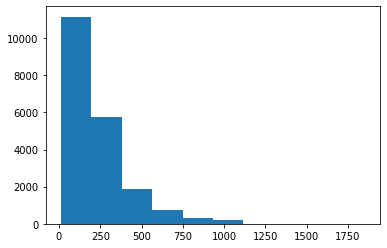

In [32]:
import matplotlib.pyplot as plt
plt.hist(l)

In [40]:
from keras.preprocessing.sequence import pad_sequences #원하는 사이즈로 자르는 도구
#기본값이 max padding
#각 원소가 가장 긴 길이를 가진 원소만큼의 길이로 원소를 가짐. 비어있는 부분은 0으로
#보통 뒤쪽의 데이터가 더 중요하다고 생각하므로(보통의 문장들이 미괄식.) 뒤쪽 데이터를 살리는 방향으로 데이터를 자르거나 늘린다
ck_x = pad_sequences(t_x, maxlen=100)


(20000, 100)

In [35]:
print(t_x[0])

[1, 73, 89, 81, 25, 60, 2, 6, 20, 141, 17, 14, 31, 127, 12, 60, 28, 2, 2, 66, 45, 6, 20, 15, 497, 8, 79, 17, 491, 8, 112, 6, 2, 20, 17, 2, 2, 4, 436, 20, 9, 2, 6, 2, 7, 493, 2, 6, 185, 250, 24, 55, 2, 5, 23, 350, 7, 15, 82, 24, 15, 2, 66, 10, 10, 45, 2, 15, 4, 20, 2, 8, 30, 17, 2, 5, 2, 17, 2, 190, 4, 20, 9, 43, 32, 99, 2, 18, 15, 8, 157, 46, 17, 2, 4, 2, 5, 2, 9, 32, 2, 5, 2, 267, 17, 73, 17, 2, 36, 26, 400, 43, 2, 83, 4, 2, 247, 74, 83, 4, 250, 2, 82, 4, 96, 4, 250, 2, 8, 32, 4, 2, 9, 184, 2, 13, 384, 48, 14, 16, 147, 2, 59, 62, 69, 2, 12, 46, 50, 9, 53, 2, 74, 2, 11, 14, 31, 151, 10, 10, 4, 20, 9, 2, 364, 352, 5, 45, 6, 2, 2, 33, 269, 8, 2, 142, 2, 5, 2, 17, 73, 17, 204, 5, 2, 19, 55, 2, 2, 92, 66, 104, 14, 20, 93, 76, 2, 151, 33, 4, 58, 12, 188, 2, 151, 12, 215, 69, 224, 142, 73, 237, 6, 2, 7, 2, 2, 188, 2, 103, 14, 31, 10, 10, 451, 7, 2, 5, 2, 80, 91, 2, 30, 2, 34, 14, 20, 151, 50, 26, 131, 49, 2, 84, 46, 50, 37, 80, 79, 6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [39]:
from keras import Sequential
from keras.layers import SimpleRNN, Dense
m=Sequential()
m.add(SimpleRNN(8,input_shape=(100,500))) #주요 단어 수도 같이 줘야함. 단어의 가짓수
m.add(Dense(1,activation = 'sigmoid'))

In [42]:
from keras.utils.np_utils import to_categorical
c_t_x = to_categorical(ck_x)
c_t_x.shape

(20000, 100, 500)

In [ ]:
c_t_x[0][0]

In [ ]:
c_v_x = c_v_x.to_categorical(v_x)

데이터 수집

In [1]:
from keras.datasets import imdb #리뷰 데이터
(X_data, y_data),(tt_x, tt_y)=imdb.load_data(num_words = 500)
#가장 많이 등장한 500종의 단어만 남기려는 parameter
#그러다 비어있는 데이터가 등장할 수도 있다.

데이터 전처리

In [2]:
from sklearn.model_selection import train_test_split
t_x, v_x, t_y, v_y=train_test_split(X_data, y_data, test_size = 0.2, random_state = 42)

In [3]:
from keras.preprocessing.sequence import pad_sequences #원하는 사이즈로 자르는 도구
#기본값이 max padding
#각 원소가 가장 긴 길이를 가진 원소만큼의 길이로 원소를 가짐. 비어있는 부분은 0으로
#보통 뒤쪽의 데이터가 더 중요하다고 생각하므로(보통의 문장들이 미괄식.) 뒤쪽 데이터를 살리는 방향으로 데이터를 자르거나 늘린다
ck_t_x = pad_sequences(t_x, maxlen=100)
ck_v_x = pad_sequences(v_x, maxlen=100)

In [4]:
from keras.utils.np_utils import to_categorical
c_t_x = to_categorical(ck_t_x)
v_tt_x = to_categorical(ck_v_x)

In [10]:
del m

In [11]:
from keras import Sequential
from keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
m=Sequential()
m.add(SimpleRNN(8,input_shape=(100,500))) #주요 단어 수도 같이 줘야함. 단어의 가짓수
m.add(Dense(1,activation = 'sigmoid'))

In [12]:
m.compile(optimizer = RMSprop(learning_rate=0.0001),loss = 'binary_crossentropy', metrics=['accuracy'])
es = EarlyStopping(patience = 4, restore_best_weights=True)
ck = ModelCheckpoint('m.h5')

In [13]:
hy = m.fit(c_t_x, t_y, validation_data = [v_tt_x, v_y], callbacks = [es, ck], batch_size=64, epochs=100)

Epoch 1/100
313/313 [==============================] - 18s 56ms/step - loss: 0.6957 - accuracy: 0.5304 - val_loss: 0.6872 - val_accuracy: 0.5538
Epoch 2/100
313/313 [==============================] - 24s 75ms/step - loss: 0.6697 - accuracy: 0.5968 - val_loss: 0.6628 - val_accuracy: 0.6146
Epoch 3/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6512 - accuracy: 0.6378 - val_loss: 0.6458 - val_accuracy: 0.6522
Epoch 4/100
313/313 [==============================] - 19s 62ms/step - loss: 0.6344 - accuracy: 0.6668 - val_loss: 0.6304 - val_accuracy: 0.6758
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6181 - accuracy: 0.6925 - val_loss: 0.6142 - val_accuracy: 0.6954
Epoch 6/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6033 - accuracy: 0.7067 - val_loss: 0.6008 - val_accuracy: 0.7084
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5878 - accuracy: 0.7203 - val_loss: 0.5869 - val_ac

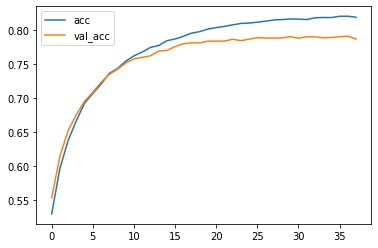

In [14]:
import matplotlib.pyplot as plt
plt.plot(hy.history['accuracy'])
plt.plot(hy.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.show()

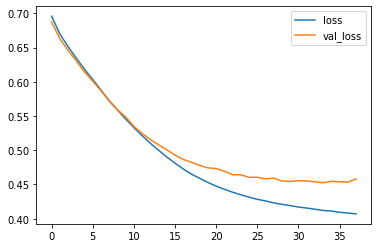

In [15]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [17]:
from keras.layers import SimpleRNN, Dense, Embedding

m1=Sequential()
m1.add(Embedding(500, 16, input_length=100)) #vacabrary의 수 500개의 단어를 16개 차원으로 만든다. 알아서 해줌
m1.add(SimpleRNN(8)) #주요 단어 수도 같이 줘야함. 단어의 가짓수
m1.add(Dense(1,activation = 'sigmoid'))
m1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [18]:
m1.compile(optimizer = RMSprop(learning_rate=0.0001),loss = 'binary_crossentropy', metrics=['accuracy'])
es = EarlyStopping(patience = 3, restore_best_weights=True)
ck = ModelCheckpoint('m.h5')
hy1 = m1.fit(ck_t_x, t_y, validation_data = [ck_v_x, v_y], callbacks = [es, ck], batch_size=64, epochs=100)

Epoch 1/100
313/313 [==============================] - 9s 24ms/step - loss: 0.6858 - accuracy: 0.5503 - val_loss: 0.6691 - val_accuracy: 0.5992
Epoch 2/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6433 - accuracy: 0.6617 - val_loss: 0.6366 - val_accuracy: 0.6622
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6116 - accuracy: 0.7085 - val_loss: 0.6088 - val_accuracy: 0.7028
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5869 - accuracy: 0.7309 - val_loss: 0.5862 - val_accuracy: 0.7260
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5652 - accuracy: 0.7472 - val_loss: 0.5735 - val_accuracy: 0.7292
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5456 - accuracy: 0.7606 - val_loss: 0.5532 - val_accuracy: 0.7464
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5284 - accuracy: 0.7704 - val_loss: 0.5405 - val_accuracy:

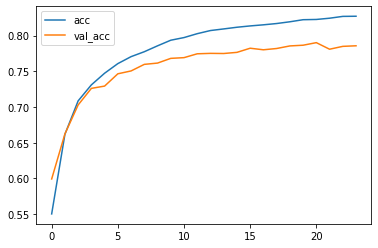

In [19]:
plt.plot(hy1.history['accuracy'])
plt.plot(hy1.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.show()

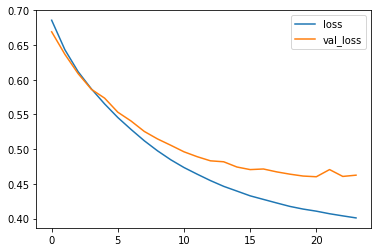

In [20]:
plt.plot(hy1.history['loss'])
plt.plot(hy1.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()